In [1]:
import numpy as np
import pandas as pd
import time
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Conv2D, Dropout, LSTM, Flatten, TimeDistributed
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from scipy.spatial.transform import Rotation as R

Using TensorFlow backend.


In [2]:
def make_relative(tgts):
    '''starts points at zeros and have targets describe
    the shift in the frame'''
    m=tgts.copy()
    m.iloc[:,:3]=tgts.iloc[:,:3].diff().fillna(0)
    return m

In [3]:
def filter_by_timestamp_closest(imageids, groundtruths):
    images=imageids[(imageids.timestamp>groundtruths.timestamp.iloc[0])&
                   (imageids.timestamp<groundtruths.timestamp.iloc[-1])]
    images['groundid']=[groundtruths.timestamp[groundtruths.timestamp<ts
                            ].idxmax() for ts in images.timestamp]
    gg=ground.iloc[images['groundid']].reset_index()
    nn=images.image_name.reset_index()
    gg['image_name']=nn.image_name
    return gg

In [4]:
def reverse_transform_relative(tgts,orig):
    a,b,c=orig.iloc[0,0],orig.iloc[0,1],orig.iloc[0,2]
    m=tgts.copy()
    m[:,0]=np.r_[a,m[1:,0]].cumsum().astype(float)
    m[:,1]=np.r_[b,m[1:,1]].cumsum().astype(float)
    m[:,2]=np.r_[c,m[1:,2]].cumsum().astype(float)
    return m

In [6]:
ls indoor

drone_indoor_forward_10/


In [5]:
x=input('drone number: ')

drone number: 3


In [6]:
df=pd.read_csv(f'indoor/drone_{x}/groundtruth.txt', sep=' ', float_precision='high')
df.drop(labels=['qw','#'],axis=1,inplace=True)
ground=df.rename(columns={'qz':'qw','qy':'qz','qx':'qy','tz':'qx','ty':'tz','tx':'ty','timestamp':'tx','id':'timestamp'})

In [7]:
df=pd.read_csv(f'indoor/drone_{x}/images.txt', sep=' ',float_precision='high')
cols=df.columns
df.rename(columns={k:v for k,v in zip(df.columns[1:3],df.columns[2:])},inplace=True)
imdf=df.iloc[:,1:3]

In [8]:
targets=filter_by_timestamp_closest(imdf,ground)

/home/poxlox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
targets.to_pickle('targets_drone_3.pkl')

In [13]:
images=np.array([[img_to_array(load_img(f'indoor/drone_{x}/'+targets.image_name.iloc[thing],color_mode='grayscale')),
            img_to_array(load_img(f'indoor/drone_{x}/'+targets.image_name.iloc[thing+1],color_mode='grayscale'))] for thing in range(len(targets)-1)])

In [14]:
images=np.array(images)

In [10]:
targets=targets.iloc[1:,2:-1]

In [16]:
reltargets=np.array(make_relative(targets))

In [14]:
# inputshape=images[0].shape

In [45]:
# m1=Sequential()
# m1.add(TimeDistributed(Conv2D(filters=64, kernel_size=(7,7), strides=(2,2),
#         padding='SAME', activation='relu',input_shape=inputshape))) #1
# m1.add(TimeDistributed(Conv2D(128, (5,5),strides=(2,2),padding='SAME', activation='relu'))) #2
# m1.add(TimeDistributed(Conv2D(256, (5,5),strides=(2,2),padding='SAME', activation='relu'))) #3
# m1.add(TimeDistributed(Conv2D(256, (3,3),strides=(1,1),padding='SAME', activation='relu'))) #4
# m1.add(TimeDistributed(Conv2D(512, (3,3),strides=(2,2),padding='SAME', activation='relu'))) #5
# m1.add(TimeDistributed(Conv2D(512, (3,3),strides=(1,1),padding='SAME', activation='relu'))) #6
# m1.add(TimeDistributed(Conv2D(512, (3,3),strides=(2,2),padding='SAME', activation='relu'))) #7
# m1.add(TimeDistributed(Conv2D(512, (3,3),strides=(2,2),padding='SAME', activation='relu'))) #8
# m1.add(TimeDistributed(Conv2D(1024, (3,3),strides=(2,2),padding='SAME'))) #9
# m1.add(TimeDistributed(Flatten()))
# m1.add(LSTM(1000, activation='sigmoid',recurrent_activation='tanh',return_sequences=True))
# m1.add(LSTM(1000, activation='sigmoid',recurrent_activation='tanh'))
# m1.add(Dense(7,activation='linear'))
# m1.compile(optimizer='Adagrad',lr=.0001,loss=['mse'])


In [7]:
m1=load_model('saves/relmodel_v3_165932.h5')

In [73]:
es=EarlyStopping(monitor='loss',patience=4)

In [74]:
m1.fit(images, reltargets,epochs=200,batch_size=71,callbacks=[es])

Epoch 1/200
1245/1245 [==============================] - 59s 47ms/step - loss: 0.0973
Epoch 2/200
1245/1245 [==============================] - 58s 47ms/step - loss: 0.0889
Epoch 3/200
1245/1245 [==============================] - 59s 47ms/step - loss: 0.0866
Epoch 4/200
1245/1245 [==============================] - 57s 46ms/step - loss: 0.0847
Epoch 5/200
1245/1245 [==============================] - 59s 47ms/step - loss: 0.0837
Epoch 6/200
1245/1245 [==============================] - 59s 47ms/step - loss: 0.0829
Epoch 7/200
1245/1245 [==============================] - 59s 47ms/step - loss: 0.0817
Epoch 8/200
1245/1245 [==============================] - 59s 47ms/step - loss: 0.0824
Epoch 9/200
1245/1245 [==============================] - 59s 48ms/step - loss: 0.0814
Epoch 10/200
1245/1245 [==============================] - 59s 48ms/step - loss: 0.0803
Epoch 11/200
1245/1245 [==============================] - 59s 48ms/step - loss: 0.0805
Epoch 12/200
1245/1245 [============================

In [109]:
m1.save(f'relmodel_{time.strftime("%H%M%S")}.h5')

In [17]:
preds1=m1.predict(images)

In [18]:
relpreds=reverse_transform_relative(preds1,targets)

In [19]:
checkpreds=reverse_transform_relative(reltargets,targets)

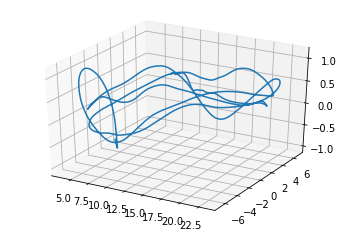

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(targets.iloc[:,0],targets.iloc[:,1],targets.iloc[:,2])
plt.show()

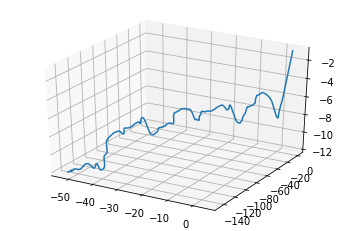

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(relpreds[:,0],relpreds[:,1],relpreds[:,2])
plt.show()

In [22]:
mang=len(relpreds[:,0])

In [80]:
div=mang//60

In [81]:
intervals=mang//div

In [138]:
d[3][0].shape

(1292, 2, 260, 346, 1)

In [6]:
dronenumbers=[3,5,6,7,9]
d={}
for x in dronenumbers:
    df=pd.read_csv(f'indoor/drone_{x}/groundtruth.txt', sep=' ', float_precision='high')
    df.drop(labels=['qw','#'],axis=1,inplace=True)
    ground=df.rename(columns={'qz':'qw','qy':'qz','qx':'qy','tz':'qx','ty':'tz','tx':'ty','timestamp':'tx','id':'timestamp'})
    df=pd.read_csv(f'indoor/drone_{x}/images.txt', sep=' ',float_precision='high')
    cols=df.columns
    df.rename(columns={k:v for k,v in zip(df.columns[1:3],df.columns[2:])},inplace=True)
    imdf=df.iloc[:,1:3]
    targets=filter_by_timestamp_closest(imdf,ground)
    images=np.array([[img_to_array(load_img(f'indoor/drone_{x}/'+targets.image_name.iloc[thing],color_mode='grayscale')),
            img_to_array(load_img(f'indoor/drone_{x}/'+targets.image_name.iloc[thing+1],color_mode='grayscale'))] for thing in range(len(targets)-1)])
    images=np.array(images)
    targets=targets.iloc[1:,2:-1]
    reltargets=np.array(make_relative(targets))
    d[x]=[images,reltargets]

/home/poxlox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [108]:
for x in d.values():
    print(len(x[0]))
    print(len(x[1]))

1292
1292
1642
1642
1104
1104
2705
2705
1245
1245


In [8]:
for x in [6,7,9]:
    df=pd.read_csv(f'indoor/drone_{x}/groundtruth.txt', sep=' ', float_precision='high')
    df.drop(labels=['qw','#'],axis=1,inplace=True)
    ground=df.rename(columns={'qz':'qw','qy':'qz','qx':'qy','tz':'qx','ty':'tz','tx':'ty','timestamp':'tx','id':'timestamp'})
    df=pd.read_csv(f'indoor/drone_{x}/images.txt', sep=' ',float_precision='high')
    cols=df.columns
    df.rename(columns={k:v for k,v in zip(df.columns[1:3],df.columns[2:])},inplace=True)
    imdf=df.iloc[:,1:3]
    targets=filter_by_timestamp_closest(imdf,ground)
    images=np.array([[img_to_array(load_img(f'indoor/drone_{x}/'+targets.image_name.iloc[thing],color_mode='grayscale')),
            img_to_array(load_img(f'indoor/drone_{x}/'+targets.image_name.iloc[thing+1],color_mode='grayscale'))] for thing in range(len(targets)-1)])
    images=np.array(images)
    targets=targets.iloc[1:,2:-1]
    reltargets=np.array(make_relative(targets))
    m1.fit(images, reltargets,epochs=200,batch_size=71,callbacks=[es])
    m1.save(f'relmodel_{time.strftime("%H%M%S")}.h5')
    preds1=m1.predict(images)
    relpreds=reverse_transform_relative(preds1,targets)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Epoch 1/200
1104/1104 [==============================] - 68s 61ms/step - loss: 0.1076
Epoch 2/200
1104/1104 [==============================] - 51s 46ms/step - loss: 0.0924
Epoch 3/200
1104/1104 [==============================] - 52s 47ms/step - loss: 0.0887
Epoch 4/200
1104/1104 [==============================] - 52s 47ms/step - loss: 0.0866
Epoch 5/200
1104/1104 [==============================] - 52s 47ms/step - loss: 0.0871
Epoch 6/200
1104/1104 [==============================] - 52s 47ms/step - loss: 0.0867
Epoch 7/200
1104/1104 [==============================] - 52s 47ms/step - loss: 0.0853
Epoch 8/200
1104/1104 [==============================] - 53s 48ms/step - loss: 0.0853
Epoch 9/200
1104/1104 [==============================] - 52s 47ms/step - loss: 0.0833
Epoch 10/200
1104/1104 [==============================] - 52s 47ms/step - loss: 0.0823
Epoch 11/200
1104/1104 [==============================] - 53s 48ms/step - loss: 0.0825
Epoch 12/200
1104/1104 [============================

2705/2705 [==============================] - 127s 47ms/step - loss: 0.0597
Epoch 103/200
2705/2705 [==============================] - 128s 47ms/step - loss: 0.0611
Epoch 104/200
2705/2705 [==============================] - 127s 47ms/step - loss: 0.0597
Epoch 105/200
2705/2705 [==============================] - 127s 47ms/step - loss: 0.0602
Epoch 106/200
2705/2705 [==============================] - 128s 47ms/step - loss: 0.0605
Epoch 107/200
2705/2705 [==============================] - 128s 47ms/step - loss: 0.0600
Epoch 108/200
2705/2705 [==============================] - 129s 48ms/step - loss: 0.0603
Epoch 109/200
2705/2705 [==============================] - 127s 47ms/step - loss: 0.0602
Epoch 110/200
2705/2705 [==============================] - 127s 47ms/step - loss: 0.0602
Epoch 111/200
2705/2705 [==============================] - 128s 47ms/step - loss: 0.0604
Epoch 112/200
2705/2705 [==============================] - 128s 47ms/step - loss: 0.0602
Epoch 113/200
2705/2705 [==========

RuntimeError: Can't decrement id ref count (file write failed: time = Sat Nov  9 20:19:20 2019
, filename = 'relmodel_201920.h5', file descriptor = 43, errno = 28, error message = 'No space left on device', buf = 0x560913833b00, total write size = 12544, bytes this sub-write = 12544, bytes actually written = 18446744073709551615, offset = 19160)

Exception ignored in: 'h5py._objects.ObjectID.__dealloc__'
Traceback (most recent call last):
  File "h5py/_objects.pyx", line 193, in h5py._objects.ObjectID.__dealloc__
RuntimeError: Can't decrement id ref count (file write failed: time = Sat Nov  9 20:19:20 2019
, filename = 'relmodel_201920.h5', file descriptor = 43, errno = 28, error message = 'No space left on device', buf = 0x560913833b00, total write size = 12544, bytes this sub-write = 12544, bytes actually written = 18446744073709551615, offset = 19160)


RuntimeError: Can't decrement id ref count (file write failed: time = Sat Nov  9 20:19:21 2019
, filename = 'relmodel_201920.h5', file descriptor = 43, errno = 28, error message = 'No space left on device', buf = 0x560901a8f410, total write size = 256, bytes this sub-write = 256, bytes actually written = 18446744073709551615, offset = 31704)

Exception ignored in: 'h5py._objects.ObjectID.__dealloc__'
Traceback (most recent call last):
  File "h5py/_objects.pyx", line 193, in h5py._objects.ObjectID.__dealloc__
RuntimeError: Can't decrement id ref count (file write failed: time = Sat Nov  9 20:19:21 2019
, filename = 'relmodel_201920.h5', file descriptor = 43, errno = 28, error message = 'No space left on device', buf = 0x560901a8f410, total write size = 256, bytes this sub-write = 256, bytes actually written = 18446744073709551615, offset = 31704)


RuntimeError: Unable to flush file's cached information (file write failed: time = Sat Nov  9 20:19:21 2019
, filename = 'relmodel_201920.h5', file descriptor = 43, errno = 28, error message = 'No space left on device', buf = 0x560912a93570, total write size = 6872, bytes this sub-write = 6872, bytes actually written = 18446744073709551615, offset = 4096)

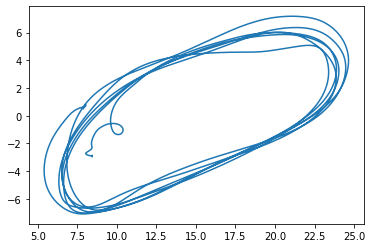

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(targets.iloc[:,0],targets.iloc[:,1])
plt.show()

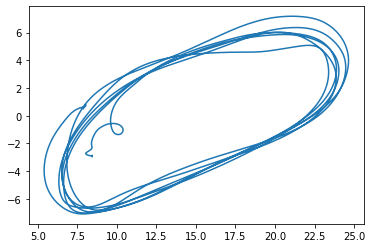

In [44]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(checkpreds[:,0],checkpreds[:,1])

In [1]:
1

1

In [7]:
trainimgs=np.array([d[x][0]for x in dronenumbers])
trainlabels=np.array([d[x][1]for x in dronenumbers])
trainimgs=np.vstack(trainimgs)
oldtrainlabels=np.vstack(trainlabels)
testimgs=images
oldtestlabels=reltargets
tt=oldtestlabels[:,3:]
testrots=[R.from_quat(bb).as_euler('zyx') for bb in tt]
tt=oldtrainlabels[:,3:]
trainrots=[R.from_quat(bb).as_euler('zyx') for bb in tt]
trainlabels=np.concatenate((oldtrainlabels[:,:3],trainrots), axis=1)
testlabels=np.concatenate((oldtestlabels[:,:3],testrots), axis=1)

In [9]:
tt=oldtestlabels[:,3:]
testrots=[R.from_quat(bb).as_euler('zyx') for bb in tt]
tt=oldtrainlabels[:,3:]
trainrots=[R.from_quat(bb).as_euler('zyx') for bb in tt]

In [10]:
trainlabels=np.concatenate((oldtrainlabels[:,:3],trainrots), axis=1)
testlabels=np.concatenate((oldtestlabels[:,:3],testrots), axis=1)

In [11]:
trainimgs.shape

(7988, 2, 260, 346, 1)

In [12]:
trainlabels.shape

(7988, 6)

In [13]:
inputshape=trainimgs[0].shape
m1=Sequential()
m1.add(TimeDistributed(Conv2D(filters=64, kernel_size=(7,7), strides=(2,2),
        padding='SAME', activation='relu',input_shape=inputshape))) #1
m1.add(TimeDistributed(Conv2D(128, (5,5),strides=(2,2),padding='SAME', activation='relu'))) #2
m1.add(Dropout(0.1))
m1.add(TimeDistributed(Conv2D(256, (5,5),strides=(2,2),padding='SAME', activation='relu'))) #3
m1.add(Dropout(0.1))
m1.add(TimeDistributed(Conv2D(256, (3,3),strides=(1,1),padding='SAME', activation='relu'))) #4
m1.add(Dropout(0.1))
m1.add(TimeDistributed(Conv2D(512, (3,3),strides=(2,2),padding='SAME', activation='relu'))) #5
m1.add(Dropout(0.1))
m1.add(TimeDistributed(Conv2D(512, (3,3),strides=(1,1),padding='SAME', activation='relu'))) #6
m1.add(Dropout(0.1))
m1.add(TimeDistributed(Conv2D(512, (3,3),strides=(2,2),padding='SAME', activation='relu'))) #7
m1.add(Dropout(0.1))
m1.add(TimeDistributed(Conv2D(512, (3,3),strides=(2,2),padding='SAME', activation='relu'))) #8
m1.add(Dropout(0.1))
m1.add(TimeDistributed(Conv2D(1024, (3,3),strides=(2,2),padding='SAME'))) #9
m1.add(Dropout(0.15))
m1.add(TimeDistributed(Flatten()))
m1.add(LSTM(1000, activation='sigmoid',recurrent_activation='tanh',return_sequences=True))
m1.add(LSTM(1000, activation='sigmoid',recurrent_activation='tanh'))
m1.add(Dense(6,activation='linear'))
m1.compile(optimizer='Adagrad',lr=.0001,loss=['mse'])


In [14]:
es=EarlyStopping(monitor='val_loss',restore_best_weights=True, patience=3)

In [ ]:
m1.fit(trainimgs,trainlabels,epochs=200,batch_size=600,callbacks=[es],validation_data=(testimgs,testlabels))

Train on 7988 samples, validate on 1245 samples
Epoch 1/200


In [22]:
m1.save(f'relmodel_v2_{time.strftime("%H%M%S")}.h5')

In [ ]:
# this shit isn't working and im dying